# Aviation Accidents Analysis Project

<img src="Images/airplane.jpg" style="width:600px;height:500px">

## Project Goal
This project aims to analyze low risk aircrafts best suited for purchase by the company

## Overview

This project analyzes aviation accident data from 1948 to 2022 involving civil aviation accidents and selected incidents in the United States and international waters. Descriptibe analysis of the aviation accidents data shows that accidents occurence vary across different models and that number of accidents vary across flight phases. The company can use this analysis to determine lowest risk aircraft best suited for purchase and ensure efficient business operations.

## 1.Business Problem
The company is venturing into the aviation industry to diversify its portfolio, focusing on purchasing and operating airplanes for both commercial and private enterprises. The company, however, lacks knowledge about the potential risks associated with different aircraft types.

This data analysis aims to tackle the  primary objective which is to identify the lowest-risk airplanes that can be purchased by the company  for the business operations by considering the following:

1.What is the distribution of number of accidents per airplane model?Which models have the lowest number of accidents?

2.What are the most common flight phases for accidents?Does it differ based on model?

3.What is the severity of accidents for different airplane models? 

These questions are essential in helping the company analyze and evaluate the aircraft best suited in terms of safety assurance, operations reliablity and efficiency and cost and reputation management as it enters this new market.

## 2.Data Understanding

The data source of this analysis is from the CSV file 'Aviation_Data.csv' pulled from the National Transportation Safety Board that includes aviation accident data from 1948 to 2022 about civil aviation accidents and selected incidents in the United States and international waters. 

The dataset contains records(rows) that represents each aircraft accident event over the period of time.

The features(columns) total to 31, showing the details of each aircraft accident event such as the date of the accident, model and make of the aircraft, type of aircraft, injury severity and fatalities, weather conditions e.t.c.

The target variables for this analysis will be the aircraft model in relation to the number of flight accidents, the  flight phases for the accidents, the severity of the accidents in relation to the aircraft models.

The data requires cleaning which shall be handled appropriately making it viable for use in our analysis.







In [255]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the dataset
In the cell below, load the 'Aviation_Data.csv' file.

In [256]:
df=pd.read_csv('Data/AviationData.csv', encoding='latin-1') #loading the csv file
df.head() #accessing the first 5 rows of the dataframe

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [257]:
df.info()#accessing a summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Converting the dates column to datetime type

In [258]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], format='%Y-%m-%d')# converting the Event.Date column to datetime format
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], format='%d-%m-%Y')# converting the Publication.Date column to datetime format

In [259]:
df.dtypes#checking the data types of each column

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

## 3.Data Preperation

### Data Cleaning
To answer the questions for this analysis, the data requires cleaning of missing values by applying the various methods to drop, replace or keep the values. 

First is identifying the amount of missing data in each column.

In [260]:
df.isna().mean().sort_values(ascending= False) #Identifying of missing values for each column in relation to entire data

Schedule                  0.858453
Air.carrier               0.812710
FAR.Description           0.639742
Aircraft.Category         0.636772
Longitude                 0.613304
Latitude                  0.613203
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number     

### Dropping columns
The 'Schedule' column is missing 85% of its data, hence it is best to drop the entire column.

In [261]:
df=df.drop('Schedule', axis=1)#dropping the schedule column from dataframe
df.isna().sum()#checking for remaining null values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

### Dropping rows
The missing data from the 'Model' and 'Make' column is less than 0.1% hence best to drop the rows with null values without much affecting the data.

In [262]:
df.dropna(subset=['Model'], inplace=True) # dropping rows with missing values in Model column
df.dropna(subset=['Make'], inplace=True)# dropping rows with missing values in Model column
df.isna().sum()#asserting no missing values left in the 'Make' and 'Model' columns

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54430
Longitude                 54439
Airport.Code              38564
Airport.Name              36031
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category         56532
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7006
FAR.Description           56841
Purpose.of.flight          6138
Air.carrier               72168
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

### Replacing missing values
The 'Amateur.Built' column has is a categorical data consisting of two types of values hence best to replace with the mode as there is few missing data.

In [263]:
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace=True)#replacing null values with the mode
assert df['Amateur.Built'].isna().sum()==0

For continuous data, the best option would be replacing with the mean of the column.

In [264]:
#replacing the missing values  with the mean to the nearest whole number
df['Number.of.Engines'].fillna(round(df['Number.of.Engines'].mean()), inplace=True)
df['Total.Fatal.Injuries'].fillna(round(df['Total.Fatal.Injuries'].mean()), inplace=True)
df['Total.Serious.Injuries'].fillna(round(df['Total.Serious.Injuries'].mean()), inplace=True)
df['Total.Minor.Injuries'].fillna(round(df['Total.Minor.Injuries'].mean()), inplace=True)
df['Total.Uninjured'].fillna(round(df['Total.Uninjured'].mean()), inplace=True)
df.isna().sum()# checking for the remaining null values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54430
Longitude                 54439
Airport.Code              38564
Airport.Name              36031
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category         56532
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                7006
FAR.Description           56841
Purpose.of.flight          6138
Air.carrier               72168
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          13765
dtype: int64

### Keep missing values
The rest of the missing values are in Categorical data and quite informative in analyzing the data, hence the best option would be to keep the null values by replacing with the string 'missing' to show the data is missing.

In [265]:
df.fillna('missing', inplace=True)#replacing the rest of the null values in the dataframe with the string missing
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

## 4.Data Analysis

### a) Accident distribution by Model
Recalling the first question: What is the distribution of number of accidents per airplane model?Which models have the lowest number of accidents?

Firstly is getting a dataframe whose category is airplane then the number of accidents that occured per model. Finally is evaluating the models with the least number of accident occurrence. 


In [266]:
new_df=df[df['Aircraft.Category']=='Airplane']#selecting rows whose aircraft category is airplane
new_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,missing,missing,...,missing,Air Canada,1.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,2017-09-19 00:00:00
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,missing,missing,missing,BLACKBURN AG STRIP,...,Personal,missing,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01 00:00:00
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,missing,missing,N58,HANOVER,...,Business,missing,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982-01-01 00:00:00
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,missing,missing,missing,missing,...,Personal,missing,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,1983-01-02 00:00:00
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,missing,missing,T72,HEARNE MUNICIPAL,...,Personal,missing,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,1983-01-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,missing,missing,0.0,0.0,0.0,1.0,missing,missing,missing,2022-12-14 00:00:00
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,missing,missing,2022-12-27 00:00:00
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,missing,missing,0.0,0.0,0.0,1.0,missing,missing,missing,2022-12-19 00:00:00
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,missing,missing,2022-12-23 00:00:00


In [267]:
new_df['Model'].value_counts()#getting the counts of accidents per model

172           870
152           451
737           404
182           345
172N          316
             ... 
MAC-145B        1
A75-300N1       1
V 35B           1
OV-10B          1
1-11-204AF      1
Name: Model, Length: 5365, dtype: int64

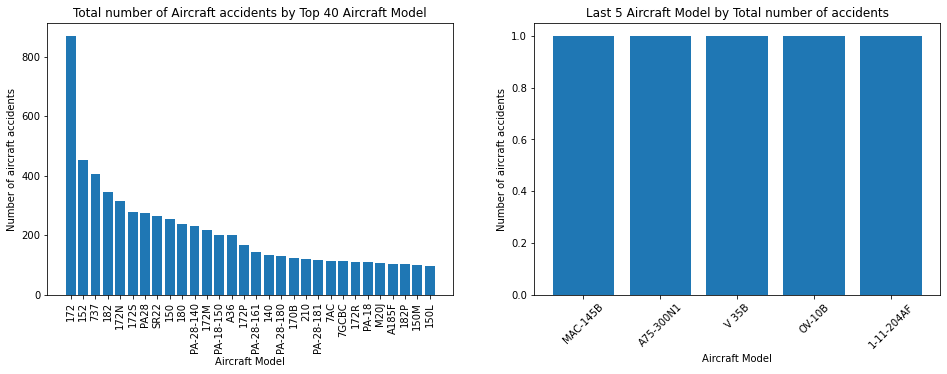

In [268]:
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = new_df["Model"].value_counts().iloc[:30]
last_5_counts = new_df["Model"].value_counts().iloc[-5:]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(last_5_counts.index, last_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Number of aircraft accidents")
ax2.set_ylabel("Number of aircraft accidents")
ax1.set_xlabel("Aircraft Model")
ax2.set_xlabel("Aircraft Model")
ax1.set_title("Total number of Aircraft accidents by Top 40 Aircraft Model")
ax2.set_title("Last 5 Aircraft Model by Total number of accidents");

### b) Accident occurence by Flight Phase 
To answer the second question: What are the most common flight phases for accidents?Does it differ based on model?

First step is finding of number of accidents that occured in each flight phase afterwhich is evaluation of this per model.

In [269]:
new_df['Broad.phase.of.flight'].value_counts()

missing        21195
Landing         2253
Takeoff         1278
Cruise           838
Approach         638
Maneuvering      511
Taxi             241
Descent          168
Go-around        154
Climb            153
Standing          75
Unknown           62
Other             14
Name: Broad.phase.of.flight, dtype: int64

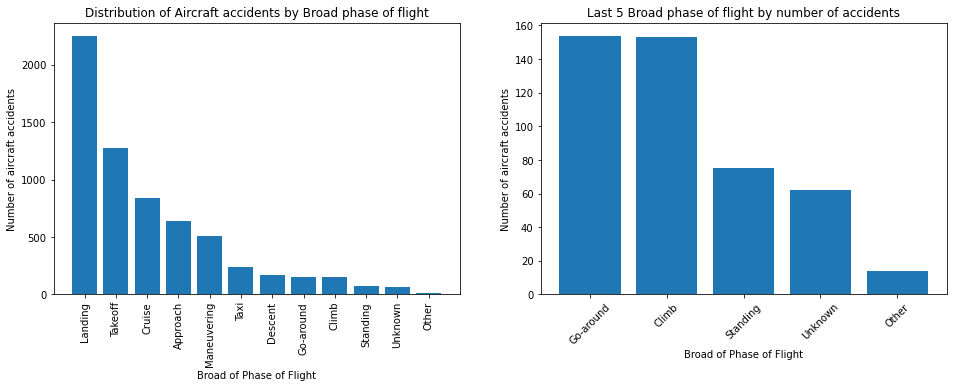

In [270]:
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = new_df["Broad.phase.of.flight"].value_counts().iloc[1:]
last_5_counts =value_counts.iloc[-5:]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(last_5_counts.index, last_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Number of aircraft accidents")
ax2.set_ylabel("Number of aircraft accidents")
ax1.set_xlabel("Broad of Phase of Flight")
ax2.set_xlabel("Broad of Phase of Flight")
ax1.set_title("Distribution of Aircraft accidents by Broad phase of flight")
ax2.set_title("Last 5 Broad phase of flight by number of accidents");

Evaluating the accident occurence for each model by  flight phase.

In [271]:
new_df.groupby('Model')['Broad.phase.of.flight'].value_counts().unstack().fillna(0)#grouping accident occurrence for each model by  flight phase 

Broad.phase.of.flight,Approach,Climb,Cruise,Descent,Go-around,Landing,Maneuvering,Other,Standing,Takeoff,Taxi,Unknown,missing
Model,,,,,,,,,,,,,
(EX) RV-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0-1A,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0-47B,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0-58A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0-58B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac CH601XL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Zodiac HDS-601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
kit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


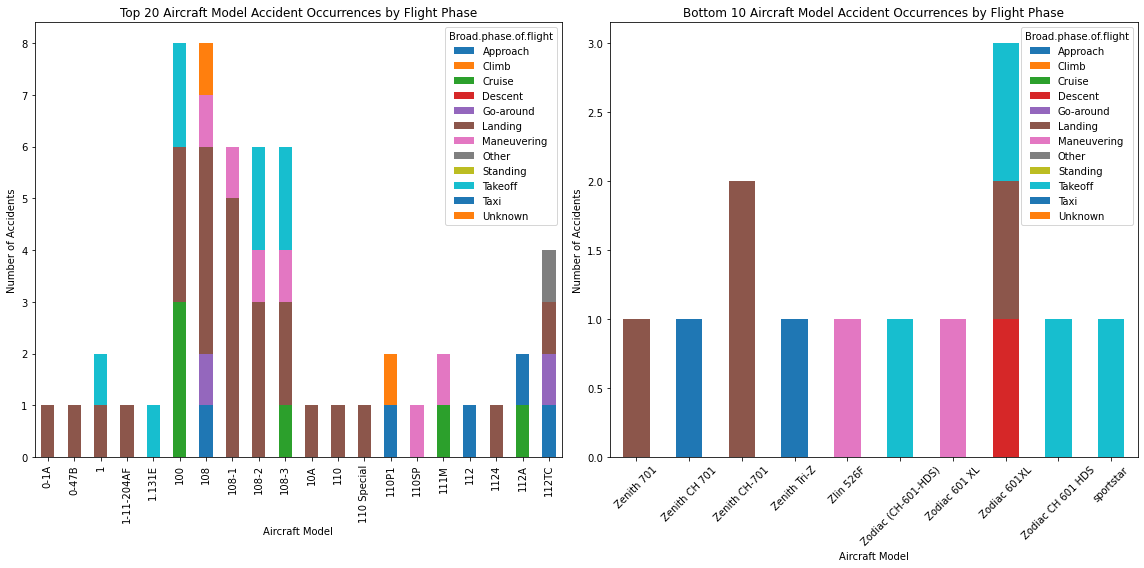

In [272]:
filtered_df = new_df[new_df['Broad.phase.of.flight'] != 'missing']#filtering the data to exclude values denoted by missing
grouped_data=filtered_df.groupby('Model')['Broad.phase.of.flight'].value_counts().unstack().fillna(0).head(20)#grouping accident occurrence for each model by  flight phase 
Bottom_10_models=filtered_df.groupby('Model')['Broad.phase.of.flight'].value_counts().unstack().fillna(0).tail(10)
# Plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

grouped_data.plot(kind='bar', stacked=True, ax=ax1)
Bottom_10_models.plot(kind='bar', stacked=True, ax=ax2)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_title('Top 20 Aircraft Model Accident Occurrences by Flight Phase')
ax2.set_title('Bottom 10 Aircraft Model Accident Occurrences by Flight Phase')
ax1.set_ylabel('Number of Accidents')
ax2.set_ylabel('Number of Accidents')
ax1.set_xlabel("Aircraft Model")
ax2.set_xlabel("Aircraft Model")

# keep legend inside the plot
ax.legend(title='Broad Phase of Flight', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

### c) Accident Severity by Model

What is the severity of accidents for different aircraft models?

Identifying the totals for each injury category by the model of aircraft.

In [273]:
agg_data=new_df.groupby('Model').agg({'Total.Fatal.Injuries':'sum',
                         'Total.Serious.Injuries':'sum', 
                         'Total.Minor.Injuries':'sum',
                         'Total.Uninjured':'sum'})#getting sum of each level of severity of accidents per model
agg_data

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Model,,,,
(EX) RV-6,2.0,0.0,0.0,0.0
0-1A,1.0,0.0,0.0,2.0
0-47B,0.0,0.0,0.0,5.0
0-58A,0.0,0.0,0.0,1.0
0-58B,0.0,1.0,0.0,2.0
...,...,...,...,...
Zodiac CH601XL,1.0,0.0,0.0,0.0
Zodiac HDS-601,0.0,1.0,0.0,0.0
kit,0.0,0.0,1.0,0.0


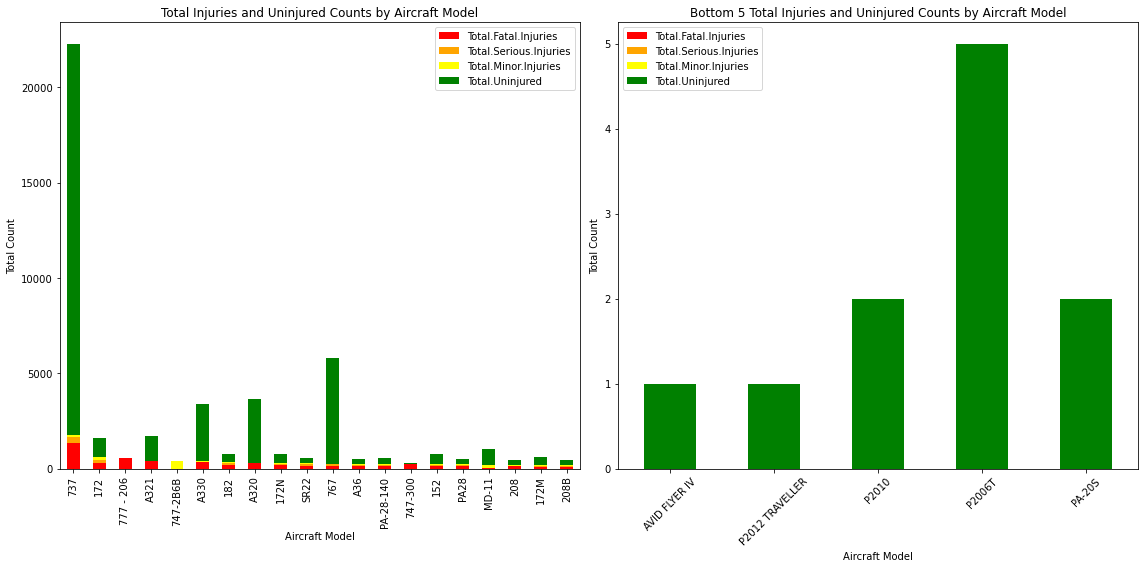

In [274]:

# Calculating total injuries for sorting
agg_data['Total.Injuries'] = agg_data['Total.Fatal.Injuries'] + agg_data['Total.Serious.Injuries'] + agg_data['Total.Minor.Injuries']

# Sorting the data by total injuries
sorted_agg_data = agg_data.sort_values(by='Total.Injuries', ascending=False).head(20)
Bottom_5=agg_data.sort_values(by='Total.Injuries', ascending=False).tail()

# Plotting the sorted data
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

sorted_agg_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].plot(
    kind='bar', stacked=True, ax=ax1, color=['red', 'orange', 'yellow', 'green']
)
Bottom_5[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].plot(
    kind='bar', stacked=True, ax=ax2, color=['red', 'orange', 'yellow', 'green']
)
# Customize appearance
ax1.tick_params(axis="x", labelrotation=90) # Rotate x-axis labels for better readability
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_title('Total Injuries and Uninjured Counts by Aircraft Model')
ax2.set_title('Bottom 5 Total Injuries and Uninjured Counts by Aircraft Model')
ax1.set_ylabel('Total Count')
ax2.set_ylabel('Total Count')
ax1.set_xlabel('Aircraft Model')
ax2.set_xlabel('Aircraft Model')
# keep legend inside the plot
ax.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()

plt.show()

In [275]:
df.to_csv('Data/Cleaned_AviationData.csv', index=False)

## 5.Conclusion

This analysis leads to three recommendations for the best suited airplanes for the company to select:

1.Select from the airplane models with lowest number of accident occurrence. From the analysis, each model varies in number of accidents occurrence. Therefore, the best airplanes to select are from the models recording the lowest accident number as they provide a higher safety assuurance. The top five these models include MAC-145B, A75-300N1, V35B, OV-10B, 1-11-204AF.

2.Choosing airplane models with lowest accident occurrence in each flight phase. From the analysis, the number of aviation accidents differs for each flight phase. Hence, models with the lowest accident occurrence in each flight phase should be selected for operations as they provide a higher guarantee of safety and smooth operations of the aircraft throughout the flight. This provides a better guarantee to the company for efficient and effective operations of the new division. Based on this, the best airplane models are Zenith 701, Zenith Tri-Z, Zin 526F, Zodiac(CH-601-HDS), Zodiac 601 XL, Sportstar.

3.Airplane models recording the lowest number of fatalities and injuries and highest number of uninjured is best suited for the company as they provide less risk and are likely more reputable amongst the public. Therefore, will be more attractive to the target customers. Based on this criteria the best suited models are AVID FLYER IV, P2012 TRAVELLER, P2010, P2006T and PA-205.The company should focus on equiping these aircrafts with better safety equipements to boost operations and reduce fatalities.  




## 6. Further Analysis
Further analysis could give more insights on other ways to best select aircrafts best suited for the company's new aviation division:

1.Prediction of accidents based on weather conditions. This investigates the impact of  weather conditions to the occurrence of aviation accidents.

2.Model need of frequency of accident occurrence by location. This could predict aircraft accident prone locations.

3.Aircraft maintenance influence on aviation accident rates. This analyzes how the level of maintenance of the aircraft impacts accident rates.


